# PROBLEM STATEMENT

* How accurately can we classify whether a sample from a body of water is potable or not potable, given its chemical and physical characteristics?

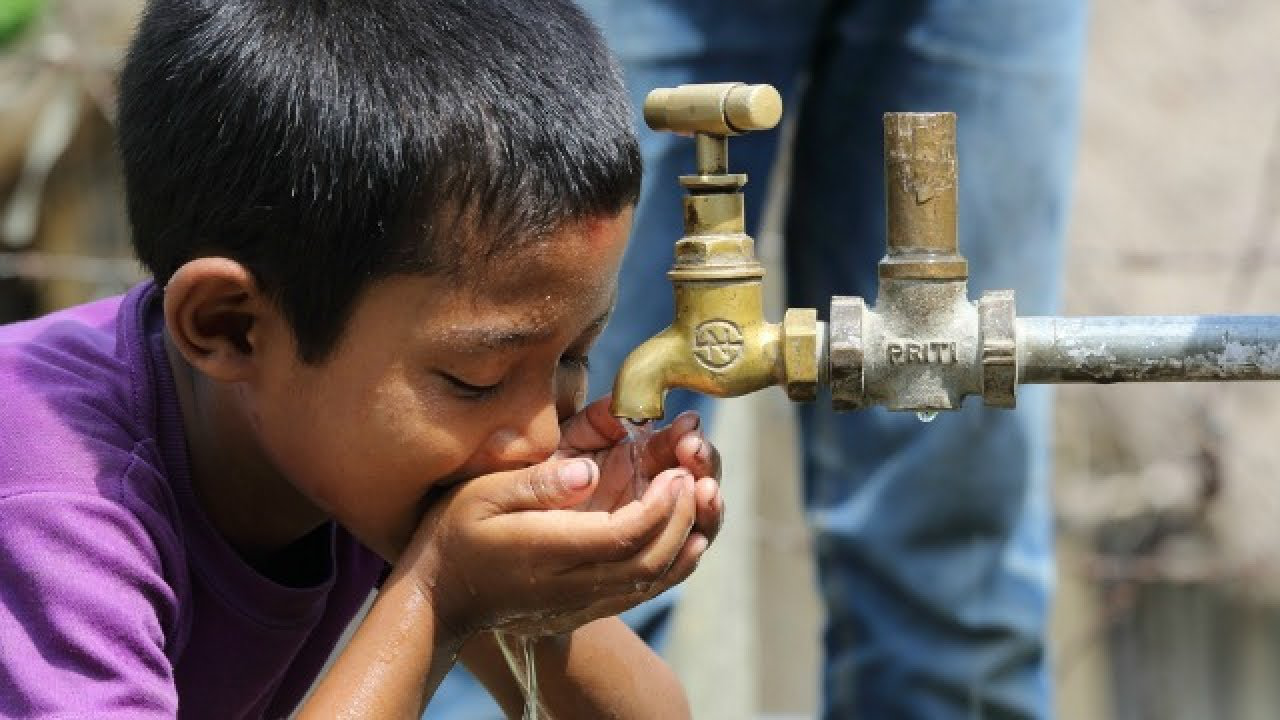

In [1]:
from PIL  import Image
img = Image.open('water_potability.jpg')
img

* The Below Columns Show For Better Understanding Of The Data

1.PH : Indicator of acidic or alkaline condition of water, ranging from 1 to 14.

Acceptable Limit: 6.5 to 8.5

2.Hardness : Capacity of water to precipitate soap in mg/L.

Acceptable Limit: Upto 500 or 600 mg/L

3.Solids : Total dissolved solids (TDS) in ppm. The water with high TDS value indicates that water is highly mineralized.

Acceptable Limit: 500 - 1000 ppm

4.Chloramines : Amount of Chloramines in ppm.

Acceptable Limit: Upto 4 ppm

5.Sulfate : Amount of Sulfates dissolved in water in mg/L.

Acceptable Limit: Upto 400 mg/L

6.Conductivity : Electrical conductivity of water in μS/cm.

Acceptable Limit: Upto 400 μS/cm

7.Organic_carbon : Amount of carbon in organic compounds in ppm.

Acceptable Limit: Less than 2 mg/L

8.Trihalomethanes: Amount of Trihalomethanes in μg/L.

Acceptable Limit: Upto 80 ppm

9.Turbidity: Measure of light emiting property of water in NTU.

Acceptable Limit: 5-10 NTU

10.Potability: Indicates if water is safe for human consumption.

Here Potable -1 and Not potable -0.



# DATA

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('water_potability.csv')

In [4]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [5]:
from math import floor,ceil
import tabulate as tb


In [6]:
l=[]
names=[]
for col in df.columns:
    names.append(col)
    l.append(f'{floor(df[col].min())} to {ceil(df[col].max())}')

tab = pd.DataFrame(list(zip(names,l)),columns =['Name', 'Range'])
print(tb.tabulate(tab, headers='keys', tablefmt='pretty'))

+---+-----------------+--------------+
|   |      Name       |    Range     |
+---+-----------------+--------------+
| 0 |       ph        |   0 to 14    |
| 1 |    Hardness     |  47 to 324   |
| 2 |     Solids      | 320 to 61228 |
| 3 |   Chloramines   |   0 to 14    |
| 4 |     Sulfate     |  129 to 482  |
| 5 |  Conductivity   |  181 to 754  |
| 6 | Organic_carbon  |   2 to 29    |
| 7 | Trihalomethanes |   0 to 124   |
| 8 |    Turbidity    |    1 to 7    |
| 9 |   Potability    |    0 to 1    |
+---+-----------------+--------------+


# EDA

# Handling Missing Values and Duplicates


In [7]:
import missingno as msno


<AxesSubplot:>

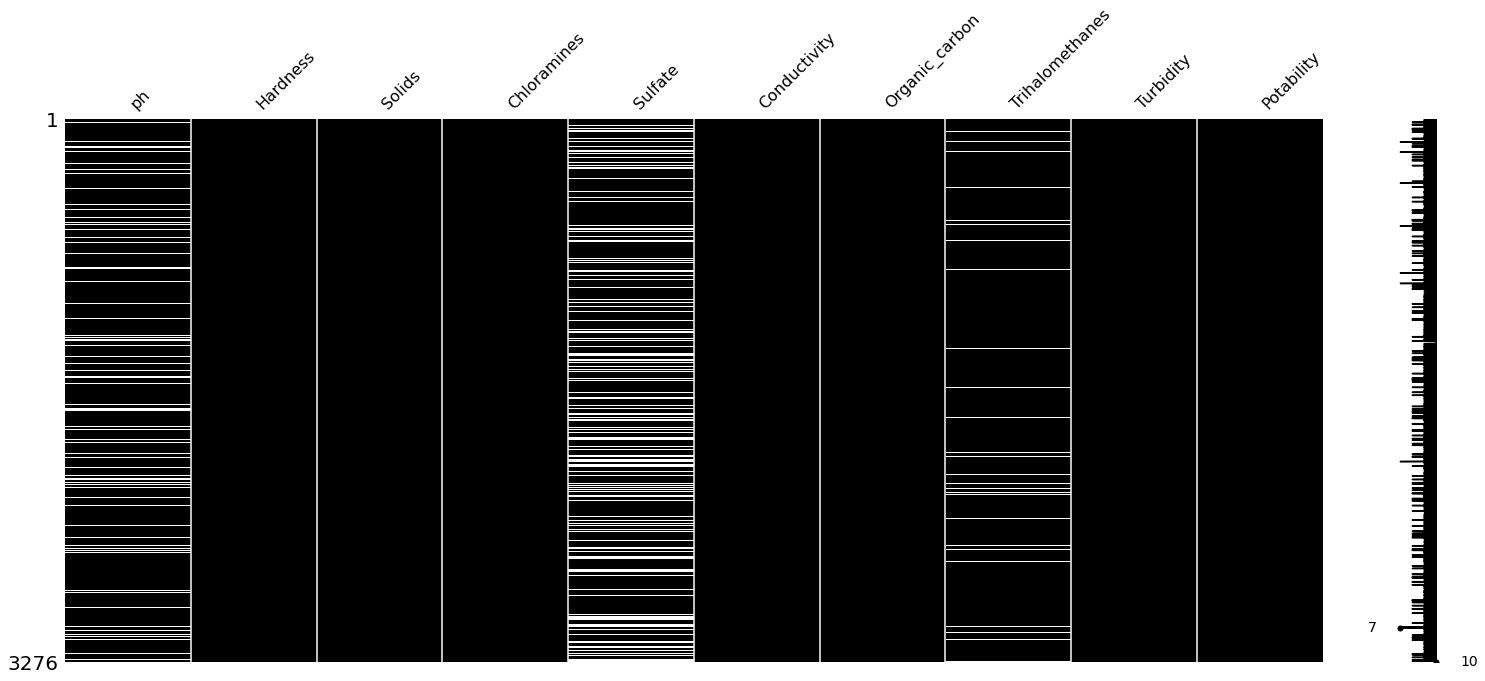

In [8]:
msno.matrix(df, color=(0, 0, 0))

In [9]:
df.isnull().sum()/len(df)

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

* ph feature have almost 15% of data missing.
* Sulfate feature have almost 24% of data missing.
* Trihalomethanes feature have almost 5% missing data.

# Null Values 

In [132]:
from sklearn.impute import KNNImputer

In [133]:
imputer = KNNImputer(n_neighbors=5, weights="uniform",add_indicator=False)

In [134]:
data=imputer.fit_transform(df)

In [135]:
df=pd.DataFrame(data,columns=df.columns)

In [11]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.085378  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  334.564290    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  334.564290    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<AxesSubplot:>

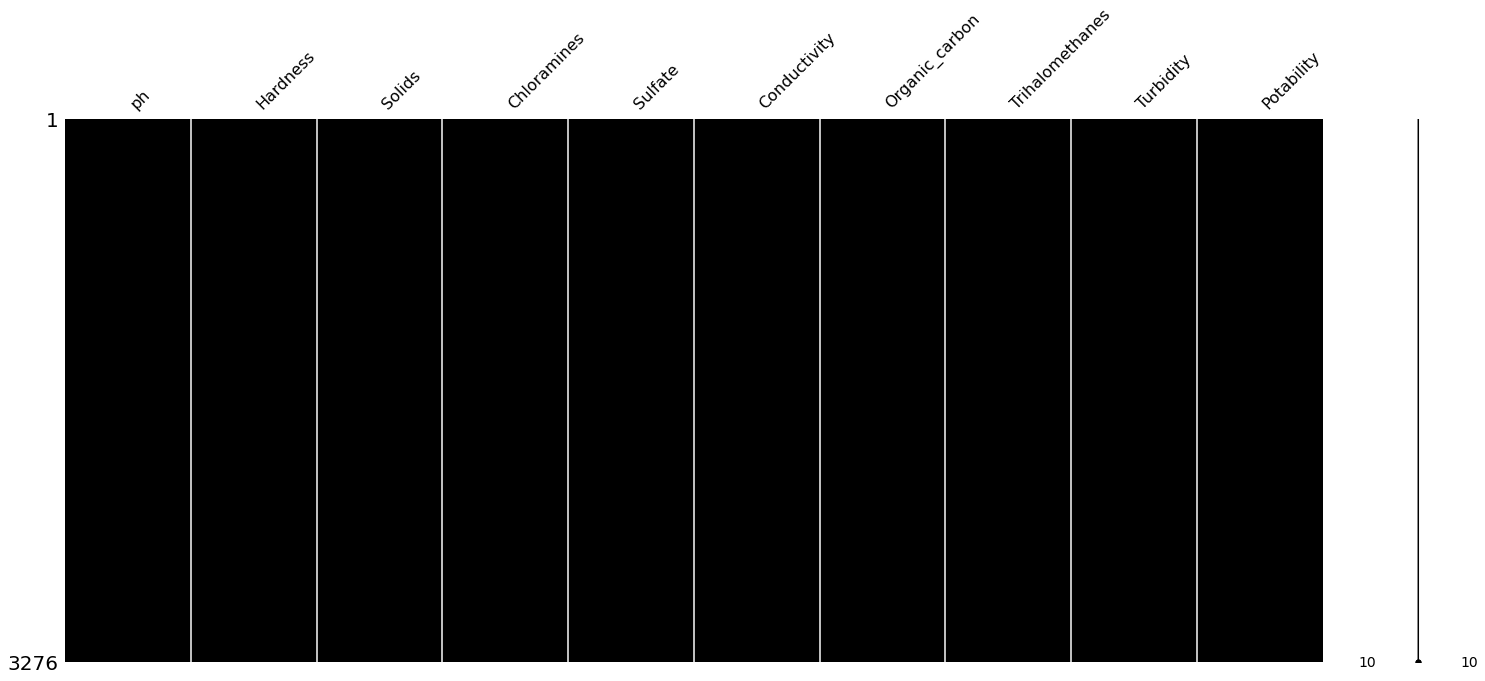

In [12]:
msno.matrix(df, color=(0, 0, 0))

* There Are No Null Values.

In [13]:
df[df.duplicated()]

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

* There Are No Duplicated Values

# Visuvalization

In [14]:
import seaborn as sns

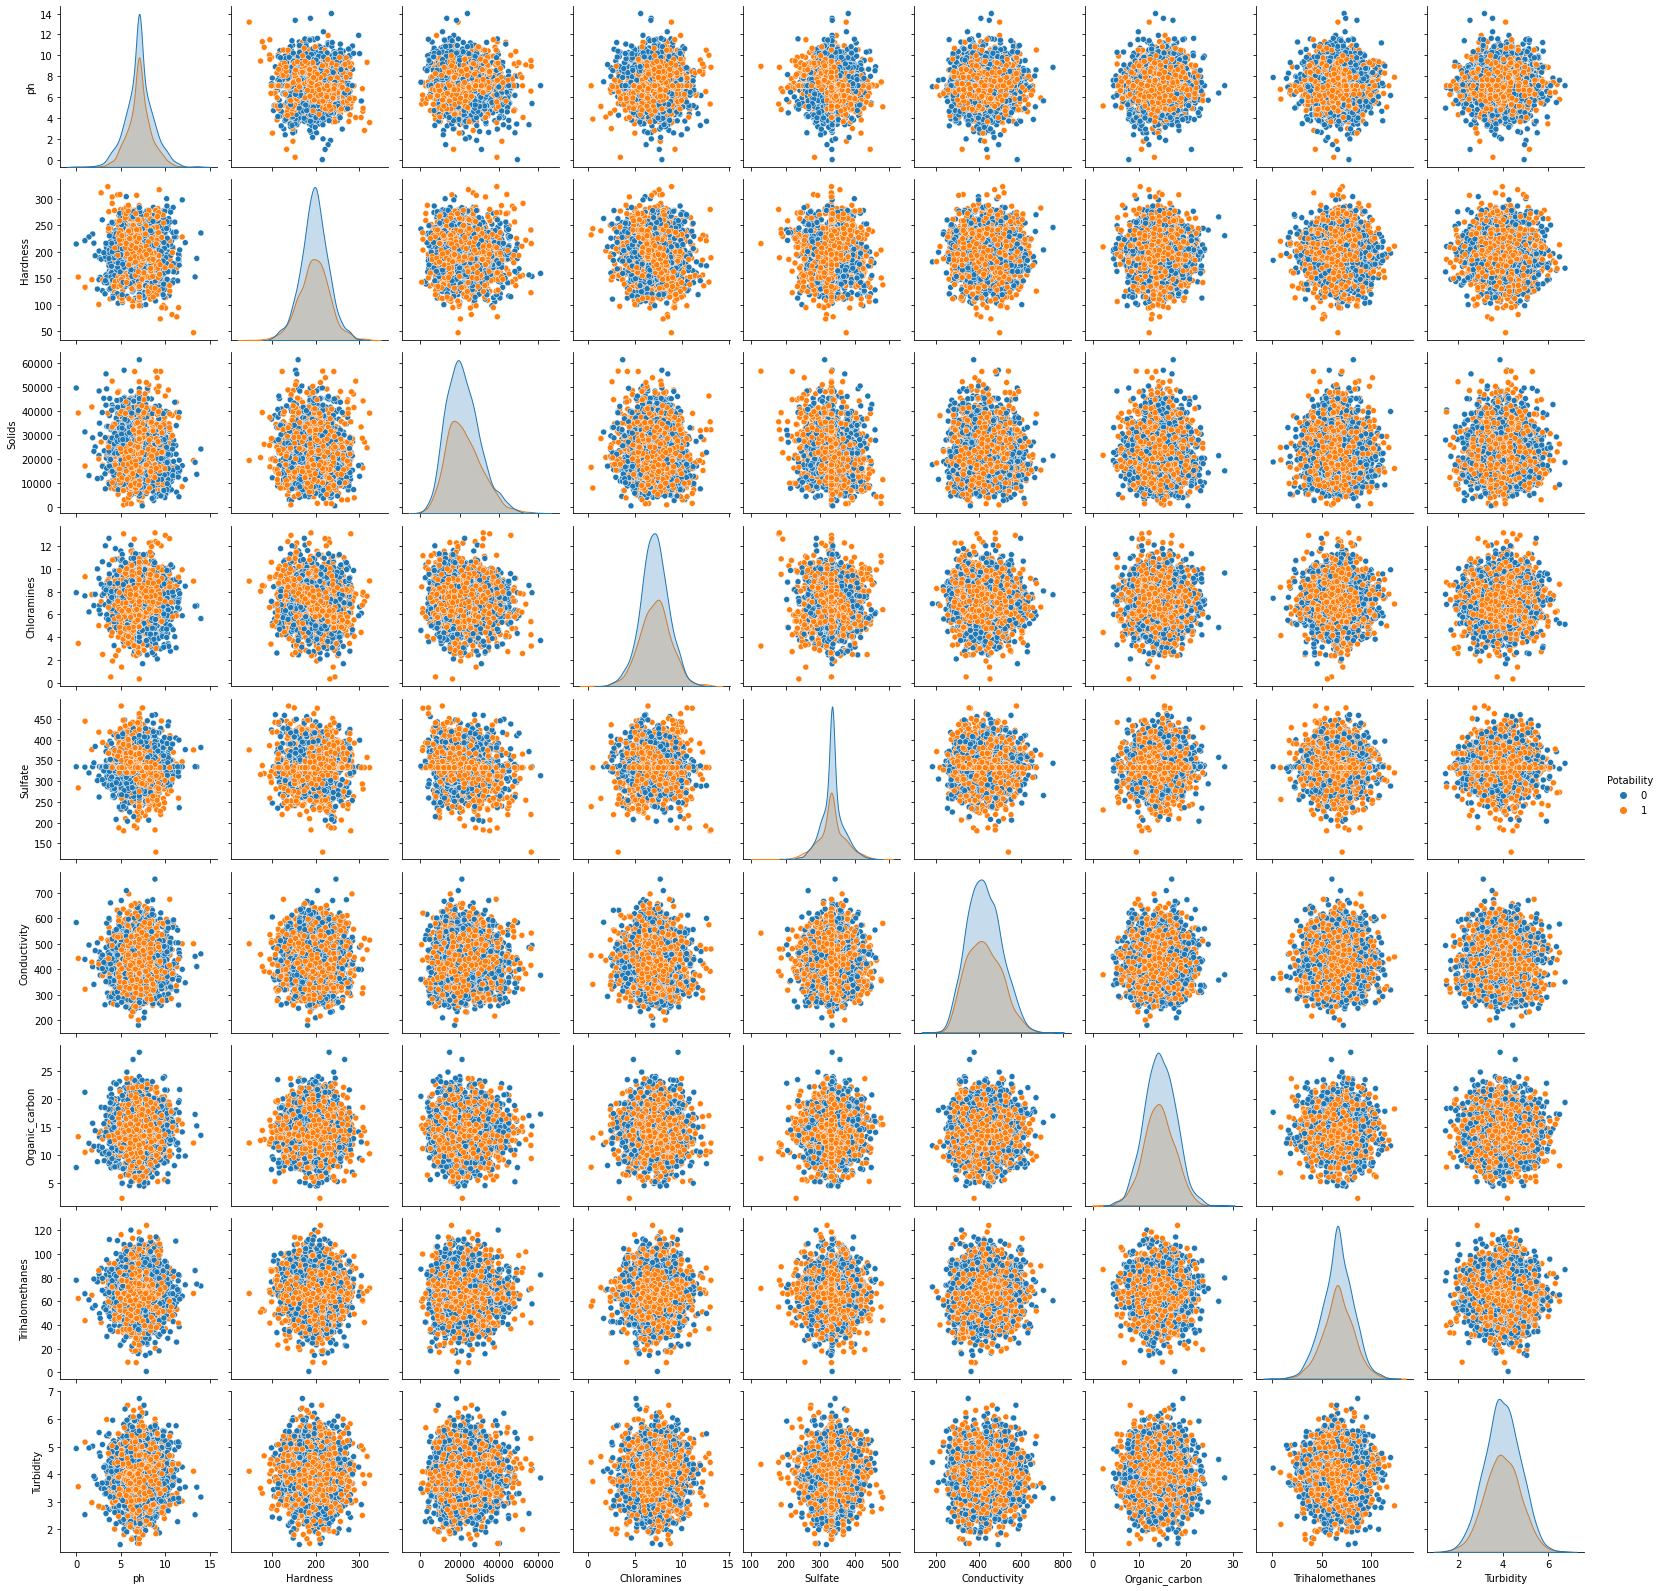

In [15]:
sns.pairplot(df,hue='Potability')

# Stats of data

In [16]:
df.describe().round(2).style.background_gradient(cmap='Blues')

In [17]:
import plotly.express as px


In [18]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, 
             values = "Potability", 
             names = ["Not Potable", "Potable"], 
             hole = 0.5, 
             opacity = 1.0, 
             labels = {"label" : "Potability", "Potability" : "Number of Samples"})

fig.update_layout(title = dict(text = "Pie Chart of Potability"))
fig.update_traces(textposition = "inside", textinfo = "percent+label")
fig.show()


In [19]:
d=df['Potability'].value_counts()
print(d)
print("1 means potable")
print("0 means Not potable")

0    1998
1    1278
Name: Potability, dtype: int64
1 means potable
0 means Not potable


# Skewness 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

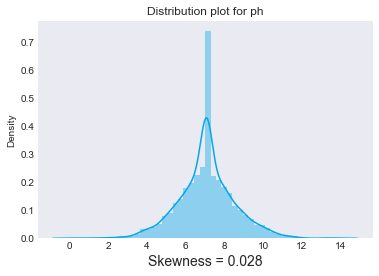

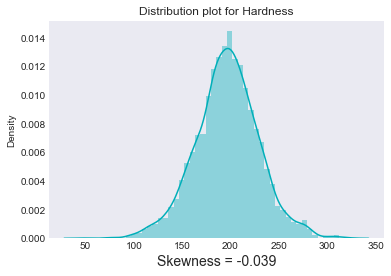

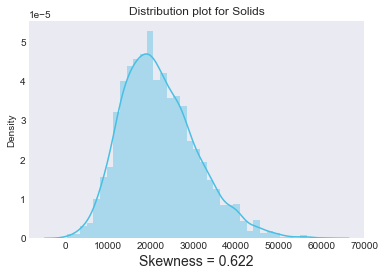

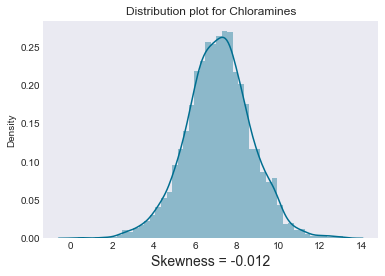

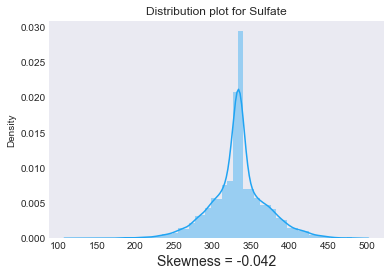

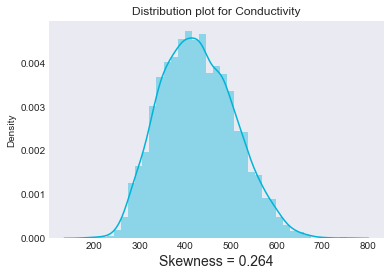

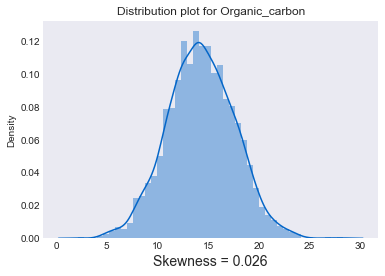

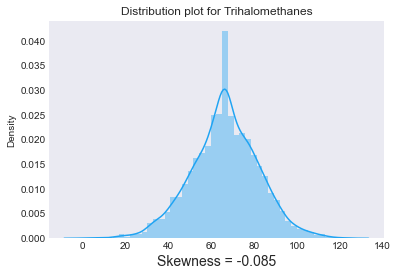

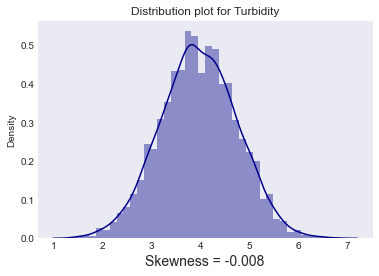

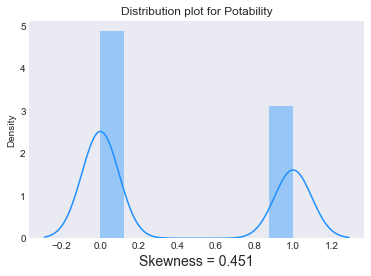

In [21]:
plt.style.use('seaborn-dark')
colors=['#00a8e8', '#00afb9',  '#48bfe3', '#006e90', '#20a4f3', '#00b4d8', '#0466c8', '#20a4f3', '#00008B','#1E90FF']
i=0
while i<10:
    for col in df.columns:
        plt.figure(figsize=(6,4))
        sns.distplot(df[col],color=colors[i])
        plt.title(f'Distribution plot for {col}')
        plt.xlabel(f'Skewness = {round(df[col].skew(),3)}',fontsize=14)
        i+=1
        plt.show()

# Correlation

<AxesSubplot:>

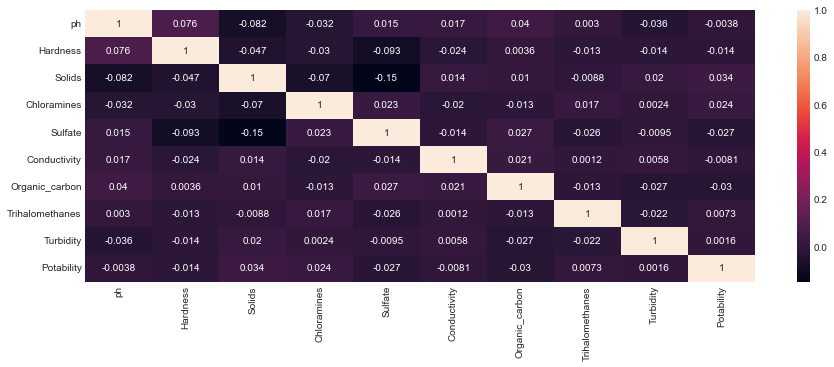

In [22]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),annot=True)


In [23]:
corr_matrix = df.corr()

In [24]:
 corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007305
Turbidity          0.001581
ph                -0.003848
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.026957
Organic_carbon    -0.030001
Name: Potability, dtype: float64

* The correlation coefficient ranges from –1 to 1.
* When it is close to 1, it means that there is a strong positive correlation.
* When it is close to -1, it means that there is a negative correlation.


# Relationship Between Each Variable and Target Variable (Potability)


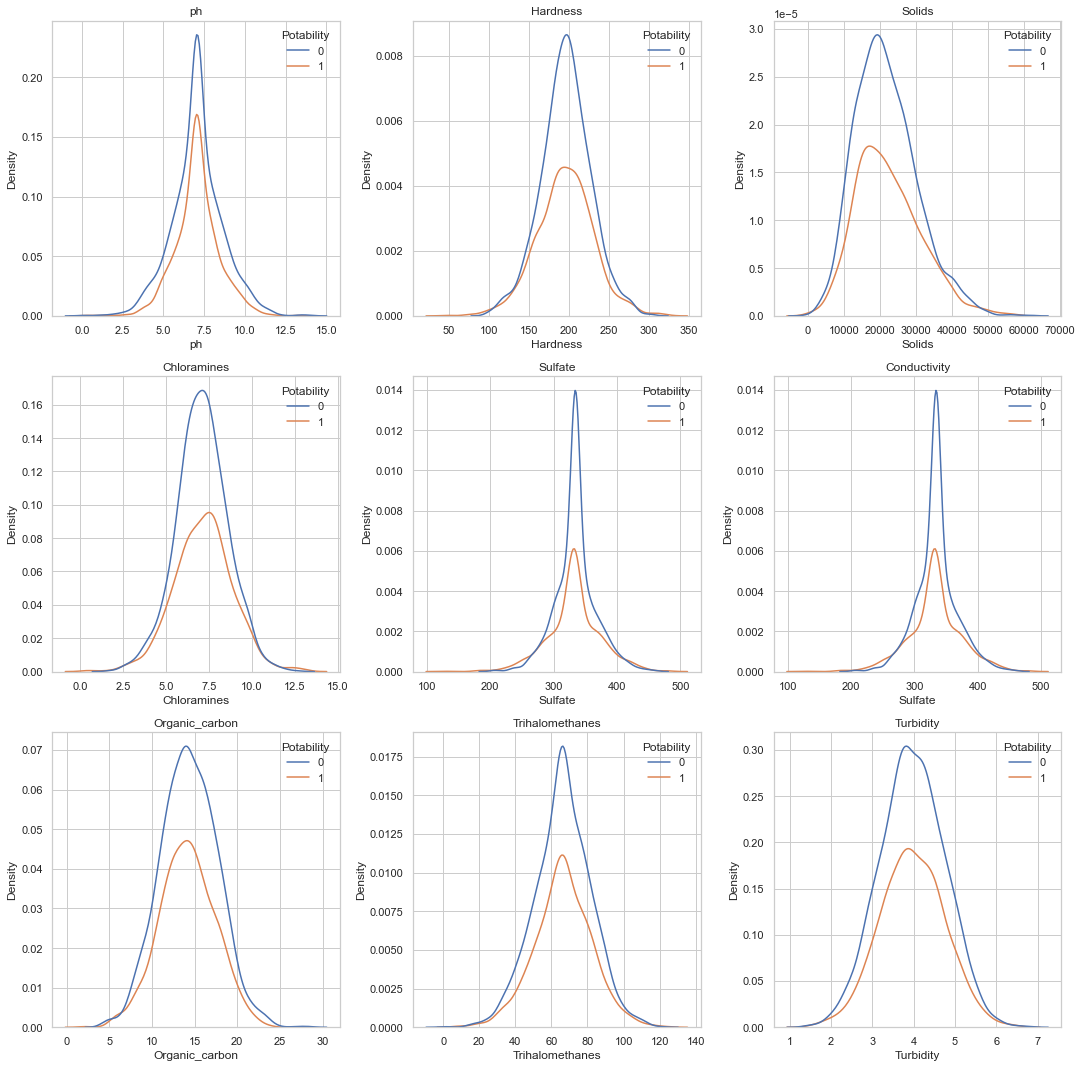

In [25]:
sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=df['ph'],hue = df['Potability'])

plt.subplot(3,3,2)
plt.title('Hardness')
sns.kdeplot(x=df['Hardness'],hue = df['Potability'])

plt.subplot(3,3,3)
plt.title('Solids')
sns.kdeplot(x=df['Solids'],hue = df['Potability'])

plt.subplot(3,3,4)
plt.title('Chloramines')
sns.kdeplot(x=df['Chloramines'],hue = df['Potability'])

plt.subplot(3,3,5)
plt.title('Sulfate')
sns.kdeplot(x=df['Sulfate'],hue = df['Potability'])

plt.subplot(3,3,6)
plt.title('Conductivity')
sns.kdeplot(x=df['Sulfate'],hue = df['Potability'])

plt.subplot(3,3,7)
plt.title('Organic_carbon')
sns.kdeplot(x=df['Organic_carbon'],hue = df['Potability'])

plt.subplot(3,3,8)
plt.title('Trihalomethanes')
sns.kdeplot(x=df['Trihalomethanes'],hue = df['Potability'])

plt.subplot(3,3,9)
plt.title('Turbidity')
sns.kdeplot(x=df['Turbidity'],hue = df['Potability'])

plt.tight_layout()

# Outliers

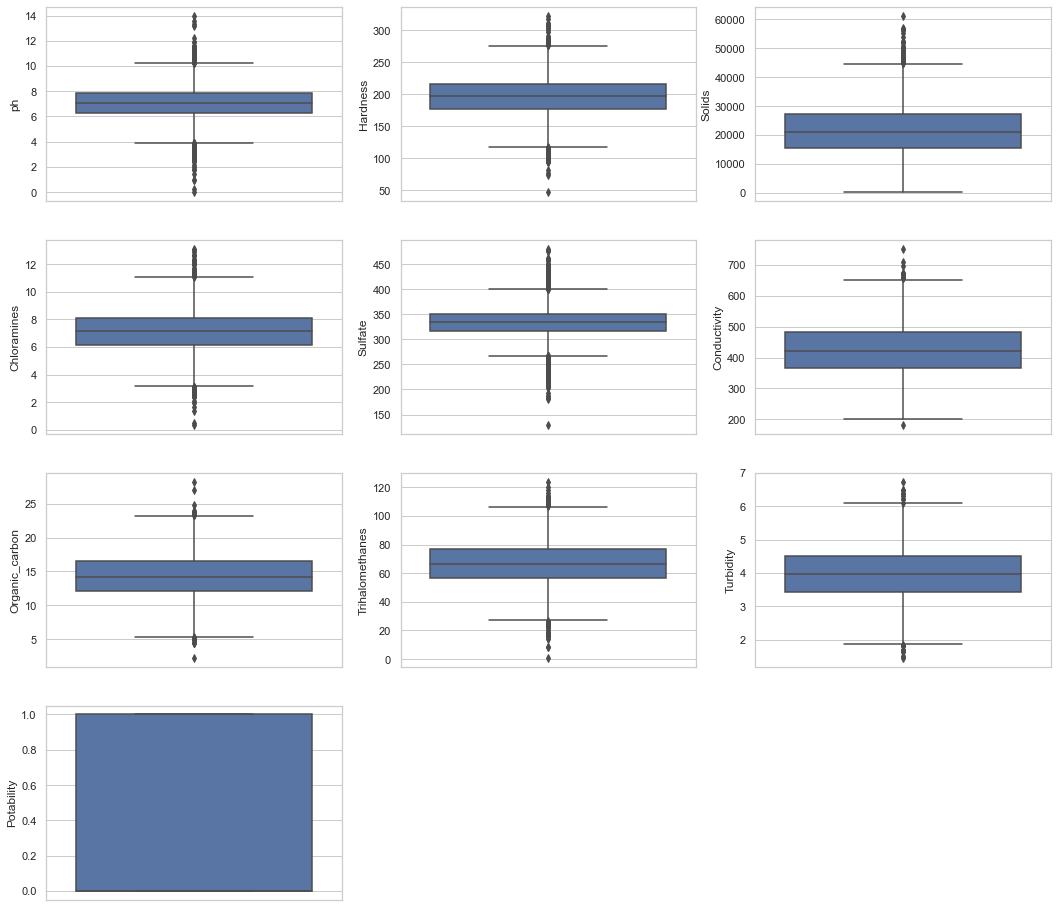

In [26]:
i=1
plt.figure(figsize=(18,25))
for feature in df.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature])
    i+=1

* There are some outliers

In [27]:
df.shape

(3276, 10)

In [28]:
df.head(1)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.085378  204.890455  20791.318981     7.300212  368.516441    564.308654   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783         86.99097   2.963135           0

# Standard Scaler

* I choose to use StandardScaler because the distribution is fairly close to a normal distribution.

In [29]:
from sklearn.preprocessing import StandardScaler

# Imbalance Data

* For Imbalance We are using sampling method

In [30]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Model Evaluation

# 1. Logistic Rgression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [35]:
confusion_matrix(y_test,y_pred)

array([[288, 222],
       [148, 161]], dtype=int64)

In [36]:
print(accuracy_score(y_test,y_pred))

0.5482295482295483


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       510
           1       0.42      0.52      0.47       309

    accuracy                           0.55       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.57      0.55      0.55       819



# 2. SVC

In [38]:
from sklearn.svm import SVC


In [39]:
svc_classifier = SVC(kernel='rbf',random_state = 42)
svc_classifier.fit(X_train,y_train)

SVC(random_state=42)

In [40]:
y_pred = svc_classifier.predict(X_test)

In [41]:
confusion_matrix(y_test,y_pred)

array([[324, 186],
       [119, 190]], dtype=int64)

In [42]:
print(accuracy_score(y_test,y_pred))

0.6275946275946276


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       510
           1       0.51      0.61      0.55       309

    accuracy                           0.63       819
   macro avg       0.62      0.63      0.62       819
weighted avg       0.65      0.63      0.63       819



# 3.KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=2)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [47]:
y_pred = knn.predict(X_test)

In [48]:
confusion_matrix(y_test,y_pred)

array([[405, 105],
       [197, 112]], dtype=int64)

In [49]:
print(accuracy_score(y_test,y_pred))

0.6312576312576312


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73       510
           1       0.52      0.36      0.43       309

    accuracy                           0.63       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.63      0.61       819



# 4.Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
#Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
y_pred = decision_tree.predict(X_test)

In [54]:
confusion_matrix(y_test,y_pred)

array([[383, 127],
       [ 96, 213]], dtype=int64)

In [55]:
print(accuracy_score(y_test,y_pred))

0.7277167277167277


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       510
           1       0.63      0.69      0.66       309

    accuracy                           0.73       819
   macro avg       0.71      0.72      0.72       819
weighted avg       0.73      0.73      0.73       819



# 5. Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier


In [58]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:
y_pred = random_forest.predict(X_test)

In [60]:
confusion_matrix(y_test,y_pred)

array([[415,  95],
       [ 87, 222]], dtype=int64)

In [61]:
print(accuracy_score(y_test,y_pred))

0.7777777777777778


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       510
           1       0.70      0.72      0.71       309

    accuracy                           0.78       819
   macro avg       0.76      0.77      0.76       819
weighted avg       0.78      0.78      0.78       819



# 7.XG Boost

In [63]:
from xgboost.sklearn import XGBClassifier


In [64]:
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
y_pred = xg.predict(X_test)

In [66]:
confusion_matrix(y_test,y_pred)

array([[399, 111],
       [ 83, 226]], dtype=int64)

In [67]:
print(accuracy_score(y_test,y_pred))

0.7631257631257631


In [68]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.78      0.80       510
           1       0.67      0.73      0.70       309

    accuracy                           0.76       819
   macro avg       0.75      0.76      0.75       819
weighted avg       0.77      0.76      0.76       819



# Hyperparameter Tuning Using GridSeacrhCV


# 1.Logistic regression

In [69]:
from sklearn.model_selection import  GridSearchCV,RandomizedSearchCV


In [70]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [71]:
logreg = LogisticRegression()


In [72]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)


In [73]:
logreg_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.0007196856730011522}
Best score is 0.5097428233038181


# 2. KNN

In [74]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


In [75]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [76]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [77]:
# find the best score
g_res.best_score_

0.675739247311828

In [78]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [79]:
g_res = KNeighborsClassifier(n_neighbors = 13, metric =  'manhattan',weights = 'distance')

In [80]:
g_res.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')

In [81]:
y_pred = g_res.predict(X_test)

In [82]:
confusion_matrix(y_test,y_pred)

array([[304, 206],
       [114, 195]], dtype=int64)

In [83]:
print(accuracy_score(y_test,y_pred))

0.6092796092796092


In [84]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.73      0.60      0.66       510
           1       0.49      0.63      0.55       309

    accuracy                           0.61       819
   macro avg       0.61      0.61      0.60       819
weighted avg       0.64      0.61      0.62       819



# 3. SVM

In [85]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   3.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.499 total time=   3.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.499 total time=   3.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.499 total time=   3.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.499 total time=   3.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.614 total time=   3.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   3.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.598 total time=   3.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.645 total time=   3.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   3.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.505 total time=   3.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.654 total time=   0.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.664 total time=   0.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.751 total time=   0.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.780 total time=   0.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.622 total time=   4.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.645 total time=   5.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.625 total time=   5.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.672 total time=   5.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.724 total time=   5.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.633 total time=   2.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.629 total time=   2.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.640 total time=   2.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [86]:
grid.best_score_

0.7080147763803508

In [87]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [88]:
svc_classifier = SVC(C= 10, gamma=1,kernel = 'rbf',random_state=42)
svc_classifier.fit(X_train,y_train)
 

SVC(C=10, gamma=1, random_state=42)

In [89]:
y_pred = svc_classifier.predict(X_test)

In [90]:
confusion_matrix(y_test,y_pred)

array([[403, 107],
       [226,  83]], dtype=int64)

In [91]:
print(accuracy_score(y_test,y_pred))

0.5934065934065934


In [92]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.64      0.79      0.71       510
           1       0.44      0.27      0.33       309

    accuracy                           0.59       819
   macro avg       0.54      0.53      0.52       819
weighted avg       0.56      0.59      0.57       819



# 4. Decision Tree

In [93]:
params = {
    'max_depth': [3,5,8,12,15],
    'min_samples_leaf': [5,8,12,15,20],
    'criterion': ["gini", "entropy"]
}

In [94]:
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [95]:
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 12, 15],
                         'min_samples_leaf': [5, 8, 12, 15, 20]},
             scoring='accuracy', verbose=1)

In [96]:
grid_search.best_score_

0.7352150537634409

In [97]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 5}

In [98]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 15,random_state=42)


In [99]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=15,
                       random_state=42)

In [100]:
y_pred = decision_tree.predict(X_test)

In [101]:
confusion_matrix(y_test,y_pred)

array([[382, 128],
       [ 89, 220]], dtype=int64)

In [102]:
print(accuracy_score(y_test,y_pred))

0.7350427350427351


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       510
           1       0.63      0.71      0.67       309

    accuracy                           0.74       819
   macro avg       0.72      0.73      0.72       819
weighted avg       0.74      0.74      0.74       819



# 5. Random Forest

In [104]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [105]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [106]:
rf = RandomForestClassifier()

In [107]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [108]:
rf_grid.fit(X_train,y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [109]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 120}

In [110]:
rf_grid.best_score_

0.7903220348542102

In [111]:
rf= (RandomForestClassifier(max_depth=None,max_features=0.6,max_samples=0.5,n_estimators=100,random_state=42))
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6, max_samples=0.5, random_state=42)

In [112]:
y_pred = rf.predict(X_test)

In [113]:
confusion_matrix(y_test,y_pred)

array([[400, 110],
       [ 76, 233]], dtype=int64)

In [114]:
print(accuracy_score(y_test,y_pred))

0.7728937728937729


In [115]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       510
           1       0.68      0.75      0.71       309

    accuracy                           0.77       819
   macro avg       0.76      0.77      0.76       819
weighted avg       0.78      0.77      0.77       819



# 6.XG BOOST

In [116]:

    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }



In [117]:
    xg = XGBClassifier()

    gsearch = GridSearchCV(estimator = xg,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)



In [118]:
 gsearch.fit(X_train,y_train)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             verbose=1)

In [119]:
gsearch.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [120]:
gsearch.best_score_

0.7926727200947493

In [121]:
xgb = XGBClassifier(colsample_bytree= 0.7,
 learning_rate = 0.01,
 max_depth = 10,
 min_child_weight =  1,
 n_estimators = 500,
 subsample = 0.7,
 random_state=42)


In [122]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [123]:
y_pred = xgb.predict(X_test)

In [124]:
confusion_matrix(y_test,y_pred)

array([[405, 105],
       [ 76, 233]], dtype=int64)

In [125]:
print(accuracy_score(y_test,y_pred))

0.778998778998779


In [126]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       510
           1       0.69      0.75      0.72       309

    accuracy                           0.78       819
   macro avg       0.77      0.77      0.77       819
weighted avg       0.78      0.78      0.78       819

